## Phi 4 Multimodal instruct on Google Colab

- First select a GPU from Runtime

In [ ]:
import requests
import torch
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor, GenerationConfig
from IPython.display import display, HTML

In [ ]:
pip install backoff

In [ ]:
pip install flash_attn==2.7.4.post1

In [ ]:
# Define model path
model_path = "microsoft/Phi-4-multimodal-instruct"

# Load model and processor
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

model = AutoModelForCausalLM.from_pretrained(
    model_path,
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
    attn_implementation='flash_attention_2',
).cuda()

# Load generation config
generation_config = GenerationConfig.from_pretrained(model_path)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]


#Image 1
<br>

<img src="https://raw.githubusercontent.com/fahimabrar/phi4/refs/heads/main/foo.jpg" alt="Alt Text" width=40%>


In [ ]:
image_two = "https://raw.githubusercontent.com/fahimabrar/phi4/refs/heads/main/foo.jpg"

In [ ]:
# Define prompt structure
user_prompt = '<|user|>'
assistant_prompt = '<|assistant|>'
prompt_suffix = '<|end|>'

# Part 1: Image Processing
print("\n--- IMAGE PROCESSING ---")

prompt = f'{user_prompt}<|image_1|>What in this image?{prompt_suffix}{assistant_prompt}'
print(f'>>> Prompt\n{prompt}')


--- IMAGE PROCESSING ---
>>> Prompt
<|user|><|image_1|>What in this image?<|end|><|assistant|>


In [ ]:
def caption (url, prompt):

  prompt = f'{user_prompt}<|image_1|>{prompt}{prompt_suffix}{assistant_prompt}'
  image = Image.open(requests.get(url, stream=True).raw)
  inputs = processor(text=prompt, images=image, return_tensors='pt').to('cuda:0')

  generate_ids = model.generate(
      **inputs,
      max_new_tokens=1000,
      generation_config=generation_config,
  )
  generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
  response = processor.batch_decode(
      generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
  )[0]

  #img_resized = image.resize((image.width // 2, image.height // 2))
  display(image)
  display(HTML(f"<h1 style='font-size:15px; color:red;'>{response}</h1>"))

  return f'>>> Response\n{response}'

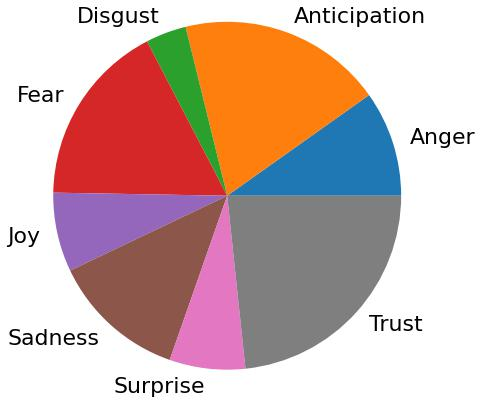

'>>> Response\nThe two dominant emotions in the pie chart are Trust and Anticipation. Trust is represented by the largest portion of the pie chart, which is colored in gray. Anticipation is the second largest portion, which is colored in orange. These two emotions are the most prevalent in the data set, indicating that they are the most common emotions expressed by the individuals in the study.\n'

In [ ]:
caption(image_two, "what are the two dominant emotion in this pie chart?")